# 1. Import

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# 2. Data loading and normalization

## 2.1. Loading

In [91]:
udemy_data = pd.read_csv('udemy_courses_dataset.csv')
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## 2.2. Normalization

In [110]:
udemy_data.shape

(3672, 15)

In [92]:
udemy_data.duplicated().sum()

np.int64(6)

In [93]:
udemy_data = udemy_data.drop_duplicates()

In [94]:
udemy_data.duplicated().sum()

np.int64(0)

In [95]:
udemy_data["course_title"]=udemy_data["course_title"].str.strip()
udemy_data["course_title"]

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3672, dtype: object

In [96]:
# Convert the published_timestamp column to datetime format
udemy_data['published_timestamp'] = pd.to_datetime(udemy_data['published_timestamp'])

# Format the datetime to day-month-year and save it back
udemy_data['published_timestamp'] = udemy_data['published_timestamp'].dt.strftime('%d-%m-%Y')


In [97]:
udemy_data['published_timestamp'] = pd.to_datetime(udemy_data['published_timestamp'])

/tmp/ipykernel_8739/3210363079.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



# 3. Analysis

## 3.1. Udemy Admin

In [98]:
udemy_data['year'] = udemy_data['published_timestamp'].dt.year

In [105]:
udemy_data["revenue"] = udemy_data["price"] * udemy_data["num_subscribers"]

In [106]:
total_revenue_per_subject = udemy_data.groupby('subject')['revenue'].sum().reset_index()

In [108]:
# Plot the total revenue for each subject
fig = px.bar(total_revenue_per_subject, x='subject', y='revenue', title="Total Revenue by Subject",
             labels={'subject': 'Subject', 'revenue': 'Total Revenue ($)'})

fig.show()

In [111]:
def categorize_duration(duration):
    if duration < 2:
        return "Short"
    elif 2 <= duration <= 10:
        return "Medium"
    else:
        return "Long"

# Apply the categorization function to the content_duration column
udemy_data['duration_category'] = udemy_data['content_duration'].apply(categorize_duration)

In [112]:
udemy_data[['course_title', 'content_duration', 'duration_category']].head()

,course_title,content_duration,duration_category
0,Ultimate Investment Banking Course,1.5,Short
1,Complete GST Course & Certification - Grow You...,39.0,Long
2,Financial Modeling for Business Analysts and C...,2.5,Medium
3,Beginner to Pro - Financial Analysis in Excel ...,3.0,Medium
4,How To Maximize Your Profits Trading Options,2.0,Medium


In [119]:
# Calculate total revenue by duration category
revenue_by_duration_category = udemy_data.groupby('duration_category')['revenue'].sum().reset_index()

# Plot the revenue distribution by duration category using a pie chart
fig = px.pie(revenue_by_duration_category, values='revenue', names='duration_category', 
             title="Revenue Percentage by Course Duration Category", 
             labels={'duration_category': 'Duration Category', 'revenue': 'Total Revenue ($)'},
            category_orders={'duration_category': ['Short', 'Medium', 'Long']},
             hole=0.3)

fig.show()

In [127]:
# Calculate total revenue by course level
revenue_by_level = udemy_data.groupby('level')['revenue'].sum().reset_index()

# Plot the revenue distribution by course level using a pie chart
fig = px.pie(revenue_by_level, values='revenue', names='level', 
             title="Revenue Percentage by Course Level", 
             labels={'level': 'Course Level', 'revenue': 'Total Revenue ($)'},
             category_orders={'level':['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level']},
             hole=0.3)
fig.show()

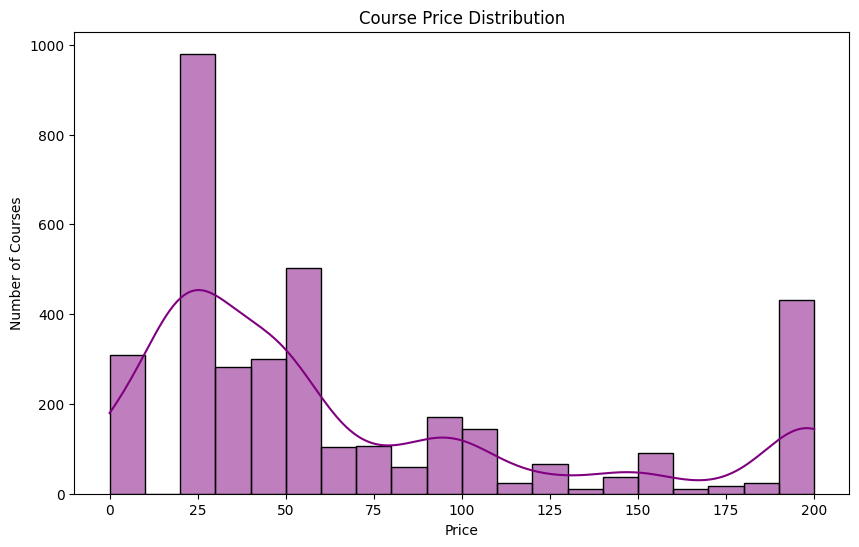

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(udemy_data['price'], bins=20, kde=True, color='purple')

plt.title('Course Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Courses')
plt.show()

In [103]:
# Low: 0 - 50
# Medium: 51 - 150
# High: 151 and above
labels = ['Low', 'Medium', 'High']
bins = [0, 50, 150, float('inf')] 
udemy_data['price_category'] = pd.cut(udemy_data['price'], bins=bins, labels=labels, right=False)

In [ ]:
# Calculate the total number of subscribers for each price category
subscribers_by_price_category = udemy_data.groupby('price_category')['num_subscribers'].sum().reset_index()

# Plot a pie chart to show the percentage of total subscribers for each price category
fig = px.pie(subscribers_by_price_category, values='num_subscribers', names='price_category', 
             category_orders={'price_category':['Low', 'Medium', 'High']},
             title="Percentage of Total Subscribers by Price Category")
fig.show()

/tmp/ipykernel_8739/2789461607.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [100]:
courses_per_year = udemy_data['year'].value_counts().sort_index().reset_index()
courses_per_year.columns = ['Year', 'Total Courses']
courses_per_year

,Year,Total Courses
0,2011,5
1,2012,45
2,2013,201
3,2014,490
4,2015,1014
5,2016,1204
6,2017,713


In [129]:
# Prepare data for the waterfall chart
fig = go.Figure(go.Waterfall(
    x=courses_per_year['Year'],
    y=courses_per_year['Total Courses'],
    text=courses_per_year['Total Courses'],
    textposition="outside",
    connector=dict(line=dict(color="blue", width=1)),
))

# Customize layout
fig.update_layout(
    title="Number of Courses Published Each Year",
    xaxis_title="Year",
    yaxis_title="Total Number of Courses",
    showlegend=False
)

fig.show()

## 3.2. Student

In [134]:
# Filter the top 10 courses with the highest number of subscribers for each subject
top_10_courses_per_subject = udemy_data.sort_values(by='num_subscribers', ascending=False).groupby('subject').head(10)

# Plot separate bar charts for each subject with only the top 10 courses
subjects = top_10_courses_per_subject['subject'].unique()

for subject in subjects:
    # Filter the data for the current subject
    subject_data = top_10_courses_per_subject[top_10_courses_per_subject['subject'] == subject]
    
    # Create a horizontal bar chart for the current subject with a color scale based on subscriber count
    fig = px.bar(subject_data, x='num_subscribers', y='course_title', orientation='h',
                 title=f"Top 10 Courses by Number of Subscribers in {subject}",
                 labels={'course_title': 'Course Title', 'num_subscribers': 'Number of Subscribers'},
                 color='num_subscribers', color_continuous_scale='Viridis')
    
    # Sort bars in descending order
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    
    # Show the plot
    fig.show()

In [136]:
# Filter to get top 10 courses with highest subscribers and lowest price per subject
top_10_low_price_high_subscribers = udemy_data.sort_values(by=['num_subscribers', 'price'], ascending=[False, True]).groupby('subject').head(10)

# Plot separate horizontal bar charts for each subject
subjects = top_10_low_price_high_subscribers['subject'].unique()

for subject in subjects:
    # Filter the data for the current subject
    subject_data = top_10_low_price_high_subscribers[top_10_low_price_high_subscribers['subject'] == subject]
    
    # Create a horizontal bar chart for the current subject with color representing the price
    fig = px.bar(subject_data, x='num_subscribers', y='course_title', orientation='h',
                 title=f"Top 10 High-Subscriber, Low-Cost Courses in {subject}",
                 labels={'course_title': 'Course Title', 'num_subscribers': 'Number of Subscribers'},
                 color='price', color_continuous_scale='Inferno')  # Use 'Inferno' color scale for contrast
    
    # Sort bars in descending order by number of subscribers
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    
    # Show the plot
    fig.show()

In [137]:
# Filter to get top 10 courses with highest subscribers and lowest number of lectures per subject
top_10_low_lectures_high_subscribers = udemy_data.sort_values(by=['num_subscribers', 'num_lectures'], ascending=[False, True]).groupby('subject').head(10)

# Plot separate horizontal bar charts for each subject
subjects = top_10_low_lectures_high_subscribers['subject'].unique()

for subject in subjects:
    # Filter the data for the current subject
    subject_data = top_10_low_lectures_high_subscribers[top_10_low_lectures_high_subscribers['subject'] == subject]
    
    # Create a horizontal bar chart for the current subject with color representing the number of lectures
    fig = px.bar(subject_data, x='num_subscribers', y='course_title', orientation='h',
                 title=f"Top 10 High-Subscriber, Low-Lecture Courses in {subject}",
                 labels={'course_title': 'Course Title', 'num_subscribers': 'Number of Subscribers'},
                 color='num_lectures', color_continuous_scale='Inferno')  # Use 'Inferno' for visibility
    
    # Sort bars in descending order by number of subscribers
    fig.update_layout(yaxis={'categoryorder': 'total ascending'})
    
    # Show the plot
    fig.show()